In [12]:
# andas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis 


In [13]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


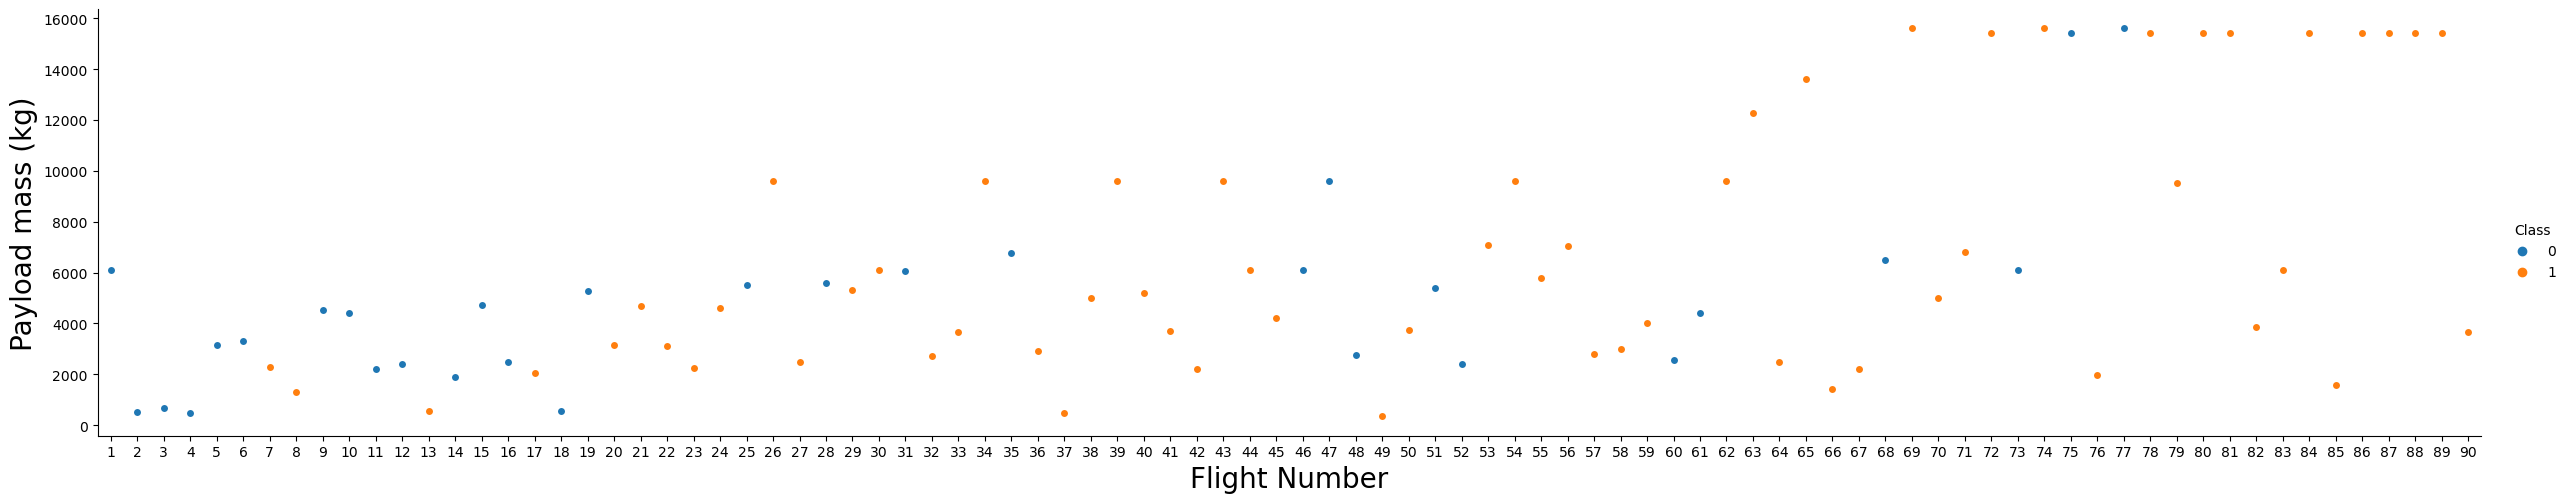

In [14]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel('Flight Number',fontsize=20)
plt.ylabel('Payload mass (kg)',fontsize=20)
plt.show()

### Visualizing the relationship between Flight Number and Launch Site


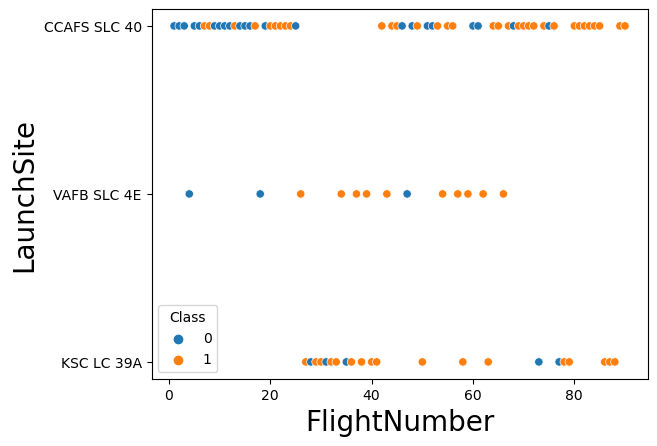

In [15]:
sns.scatterplot(data=df, x='FlightNumber', y='LaunchSite', hue='Class')
plt.ylabel('LaunchSite',fontsize=20)
plt.xlabel('FlightNumber',fontsize=20)
plt.show()

### Visualize=ing the relationship between Payload and Launch Site


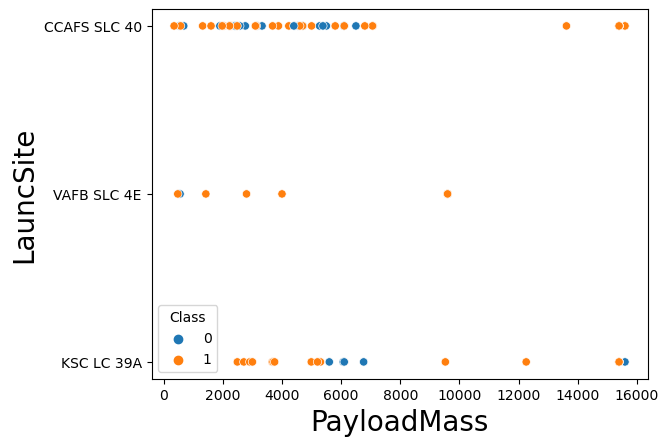

In [19]:
sns.scatterplot(data=df,x='PayloadMass',y='LaunchSite',hue='Class')
plt.ylabel('LauncSite',fontsize=20)
plt.xlabel('PayloadMass',fontsize=20)
plt.show()

### Visualizing the relationship between success rate of each orbit type


In [ ]:
#Class shows outcomes of fligh as a binary, so we group Orbit and finds mean of Class
success_rate_by_orbit=df.groupby('Orbit')['Class'].mean().reset_index()
print(success_rate_by_orbit)
sns.barplot(data=success_rate_by_orbit, x='Orbit', y='Class')

plt.xlabel('Orbit', fontsize=12)
plt.ylabel('Success Rate', fontsize=12)
plt.title('Success Rate by Orbit Type', fontsize=14)

plt.show()

### Visualizing the relationship between FlightNumber and Orbit type


In [ ]:
sns.barplot(data=df x='FlightNumber', y='Orbit',hue='Class')
plt.xlabel('FlightNumber', fontsize=12)
plt.ylabel('Orbit', fontsize=12)
plt.show()

### Visualizing the relationship between Payload and Orbit type


In [ ]:
sns.scatterplot(data=df x='Payload', y='Orbit',hue='Class')
plt.xlabel('Payload', fontsize=12)
plt.ylabel('Orbit', fontsize=12)
plt.show()

### Visualizing the launch success yearly trend


In [ ]:
def extract_year(date):
    return date.split('-')[0]
df['Year']=df['Date'].apply(extract_year)
success_rate_by_year=df.groupby('Year')['Class'].mean()
sns.lineplot(x=success_rate_by_year.index,y=success_rate_by_year.values)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Success Rate', fontsize=12)
plt.title('Average Launch Success Trend', fontsize=14)
plt.show()

## Features Engineering 


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [20]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


 ### Creating dummy variables to categorical columns


In [24]:
features_one_hot=pd.get_dummies(features)
features_one_hot


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,15400.000000,2,True,True,True,5.0,2,0,0,...,0,0,0,0,0,0,0,0,1,0
86,87,15400.000000,3,True,True,True,5.0,2,0,0,...,0,0,0,0,0,0,1,0,0,0
87,88,15400.000000,6,True,True,True,5.0,5,0,0,...,0,0,0,1,0,0,0,0,0,0
88,89,15400.000000,3,True,True,True,5.0,2,0,0,...,0,0,0,0,0,0,0,0,1,0


### Casting all numeric values to float64 and saving as a csv

In [26]:
features_one_hot=features_one_hot.astype('float64')
features_one_hot.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object

In [ ]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)